In [1]:
url="https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz"

In [2]:
import os
os.path.basename(url)

'housing.tgz'

In [4]:
os.listdir(file_path)

['config.yaml']

In [3]:
file_path=r"C:\Users\HPr\Documents\project\Ml_Projekt\config"

In [6]:
import pandas as pd
csv_file_path="C:\\Users\\HPr\\Documents\\project\\Ml_Projekt\\housing\\artifact\\data_ingestion\\2022-06-27-23-02-16\\raw_data\\housing.csv"
housing_data_frame= pd.read_csv(csv_file_path)

In [9]:
import matplotlib.pyplot as plt 

<AxesSubplot:ylabel='Frequency'>

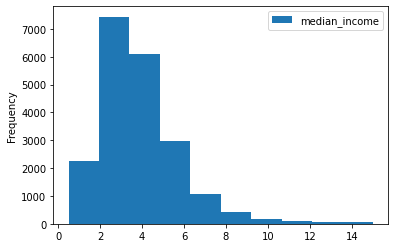

In [10]:
housing_data_frame[["median_income"]].plot(kind="hist")

In [11]:
import numpy as np

In [12]:
housing_data_frame["income_cat"] = pd.cut(
                housing_data_frame["median_income"],
                bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                labels=[1,2,3,4,5]
            )

In [14]:
housing_data_frame.income_cat.value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

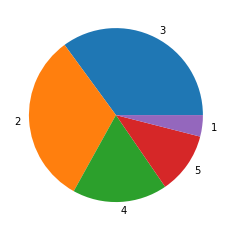

In [15]:
plt.pie(housing_data_frame.income_cat.value_counts(),labels=housing_data_frame.income_cat.value_counts().index)
plt.show()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

In [17]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)

In [19]:
for train_ix,test_ix in split.split(housing_data_frame,housing_data_frame["income_cat"]):
    print(train_ix,test_ix)

[12655 15502  2908 ... 19263 19140 19773] [ 5241 17352  3505 ... 17223 10786  3965]


In [20]:
train_df= housing_data_frame.loc[train_ix]
test_df= housing_data_frame.loc[test_ix]

In [21]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [22]:
test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN,2
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN,2
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN,4
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN,4


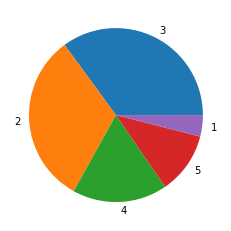

In [23]:
plt.pie(train_df.income_cat.value_counts(),labels=train_df.income_cat.value_counts().index)
plt.show()

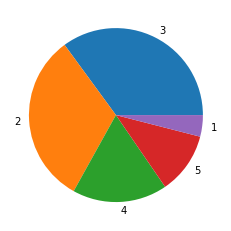

In [24]:
plt.pie(test_df.income_cat.value_counts(),labels=test_df.income_cat.value_counts().index)
plt.show()

In [25]:
housing_data_frame.columns,housing_data_frame.dtypes

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity', 'income_cat'],
       dtype='object'),
 longitude              float64
 latitude               float64
 housing_median_age     float64
 total_rooms            float64
 total_bedrooms         float64
 population             float64
 households             float64
 median_income          float64
 median_house_value     float64
 ocean_proximity         object
 income_cat            category
 dtype: object)

In [26]:
housing_data_frame.dtypes.index,housing_data_frame.dtypes.values

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity', 'income_cat'],
       dtype='object'),
 array([dtype('float64'), dtype('float64'), dtype('float64'),
        dtype('float64'), dtype('float64'), dtype('float64'),
        dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
        CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)],
       dtype=object))

In [27]:
list(map(lambda x:str(x).replace("dtype('","").replace("')",""),housing_data_frame.values))

["[-122.23 37.88 41.0 880.0 129.0 322.0 126.0 8.3252 452600.0 'NEAR BAY' 5]",
 "[-122.22 37.86 21.0 7099.0 1106.0 2401.0 1138.0 8.3014 358500.0 'NEAR BAY'\n 5]",
 "[-122.24 37.85 52.0 1467.0 190.0 496.0 177.0 7.2574 352100.0 'NEAR BAY' 5]",
 "[-122.25 37.85 52.0 1274.0 235.0 558.0 219.0 5.6431 341300.0 'NEAR BAY' 4]",
 "[-122.25 37.85 52.0 1627.0 280.0 565.0 259.0 3.8462 342200.0 'NEAR BAY' 3]",
 "[-122.25 37.85 52.0 919.0 213.0 413.0 193.0 4.0368 269700.0 'NEAR BAY' 3]",
 "[-122.25 37.84 52.0 2535.0 489.0 1094.0 514.0 3.6591 299200.0 'NEAR BAY' 3]",
 "[-122.25 37.84 52.0 3104.0 687.0 1157.0 647.0 3.12 241400.0 'NEAR BAY' 3]",
 "[-122.26 37.84 42.0 2555.0 665.0 1206.0 595.0 2.0804 226700.0 'NEAR BAY' 2]",
 "[-122.25 37.84 52.0 3549.0 707.0 1551.0 714.0 3.6912 261100.0 'NEAR BAY' 3]",
 "[-122.26 37.85 52.0 2202.0 434.0 910.0 402.0 3.2031 281500.0 'NEAR BAY' 3]",
 "[-122.26 37.85 52.0 3503.0 752.0 1504.0 734.0 3.2705 241800.0 'NEAR BAY' 3]",
 "[-122.26 37.85 52.0 2491.0 474.0 1098.0 468.

In [28]:
list(map(lambda x:str(x).replace("dtype('","").replace("')",""),housing_data_frame.dtypes.values))

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'object',
 'category']

In [32]:
data_type=list(map(lambda x:str(x).replace("dtype('","").replace("')",""),housing_data_frame.dtypes.values))

In [33]:
column = housing_data_frame.columns

In [34]:
dict(zip(column,data_type))

{'longitude': 'float64',
 'latitude': 'float64',
 'housing_median_age': 'float64',
 'total_rooms': 'float64',
 'total_bedrooms': 'float64',
 'population': 'float64',
 'households': 'float64',
 'median_income': 'float64',
 'median_house_value': 'float64',
 'ocean_proximity': 'object',
 'income_cat': 'category'}